# Космический корабль
**Предсказать, какие пассажиры переместятся в другое измерение**

Представим, что спустя несколько сотен лет мы сможем премещаться в паралельные измерения. Нам нужно предсказать смог ли успешно пассажир переместиться в другое измерение во время столкновения космического корабля с пространственно-временной аномалией. Чтобы помочь вам сделать эти прогнозы, вам дается набор личных записей, извлеченных из поврежденной компьютерной системы корабля. Этот датасет похож на классический обучающий датасет "Титаник", но в новой тематике. 

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

Загрузим Dataset

In [2]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


Посмотрим на количество данных.

In [4]:
train.shape, test.shape

((8693, 14), (4277, 13))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

У нас есть незаполненные данные.

In [7]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

Номер каюты может существенно влиять на ответ. Посмотрим на количество уникальных.

In [8]:
train['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [9]:
hp = train['Cabin'].value_counts()
hp

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

Теперь заполним недостающие данные.

In [10]:
# Fill in the missing values
train['HomePlanet'].fillna(method='bfill', inplace=True)
train['CryoSleep'].fillna('False', inplace=True)
train['Cabin'].fillna(method='bfill', inplace=True)
train['Destination'].fillna('PSO J318.5-22', inplace=True)
train['Age'].fillna(method='bfill', inplace=True)
train['VIP'].fillna('False', inplace=True)
train['RoomService'].fillna(method='ffill', inplace=True)
train['FoodCourt'].fillna(method='ffill', inplace=True)
train['ShoppingMall'].fillna(method='ffill', inplace=True)
train['Spa'].fillna(method='ffill', inplace=True)
train['VRDeck'].fillna(method='ffill', inplace=True)
train['Name'].fillna('ZZZ', inplace=True)

test['HomePlanet'].fillna(method='bfill', inplace=True)
test['CryoSleep'].fillna('False', inplace=True)
test['Cabin'].fillna(method='bfill', inplace=True)
test['Destination'].fillna('PSO J318.5-22', inplace=True)
test['Age'].fillna(method='bfill', inplace=True)
test['VIP'].fillna('False', inplace=True)
test['RoomService'].fillna(method='ffill', inplace=True)
test['FoodCourt'].fillna(method='ffill', inplace=True)
test['ShoppingMall'].fillna(method='ffill', inplace=True)
test['Spa'].fillna(method='ffill', inplace=True)
test['VRDeck'].fillna(method='ffill', inplace=True)
test['Name'].fillna('ZZZ', inplace=True)


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   object 
 3   Cabin         4277 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4277 non-null   object 
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4277 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


Готово, проверяем.

In [13]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [14]:
test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

**EDA**

Разделим пассжиров по целевому признаку.

In [15]:
yes = train[train['Transported'] == True]
no = train[train['Transported'] == False]

In [16]:
# Plot a pie on transported people
Transported = train[train['Transported'] == True]
notTransported = train[train['Transported'] == False]

print("Transported: ", len(Transported))
print("Not_Transported: ", len(notTransported))

Transported:  4378
Not_Transported:  4315


Посмотрим в процентном соотношеии значения целевой переменной.

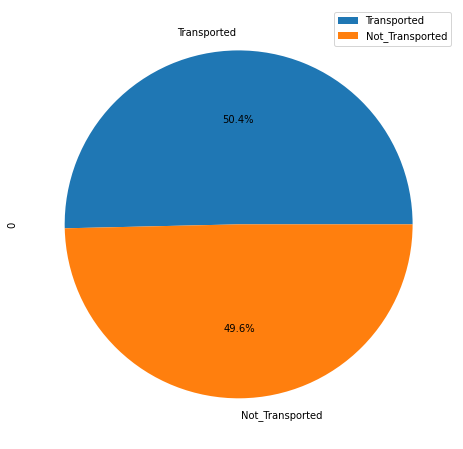

In [17]:
ppl_Transported = pd.DataFrame([ len(Transported), len(notTransported)], index=['Transported', 'Not_Transported'])
ppl_Transported.plot(kind = 'pie', subplots = True, figsize=(16,8), autopct = '%1.1f%%' )
None

Целевая переменная хорошо сбалансированна.

In [20]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [21]:
yes.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,Candra Jacostaffey,True


In [22]:
no.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
13,0010_01,Earth,False,G/1/S,TRAPPIST-1e,48.0,False,719.0,1.0,65.0,0.0,24.0,Reney Baketton,False
15,0012_01,Earth,False,F/3/P,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False


Посмотрим откуда наши посажиры отправились в путь.

In [23]:
train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

Странно, что `Europa` это планета.

In [24]:
ev = train['HomePlanet'].value_counts()
ev

Earth     4697
Europa    2184
Mars      1812
Name: HomePlanet, dtype: int64

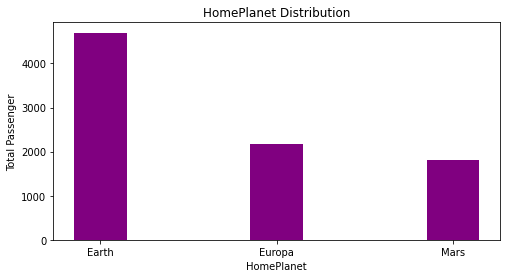

In [25]:
# bar graph on planet distribution
fig = plt.figure(figsize = (8, 4))

# Creating a Bar plot
plt.bar(ev.index, ev, color='purple', width=0.3)

plt.title('HomePlanet Distribution')
plt.xlabel('HomePlanet')
plt.ylabel('Total Passenger')
plt.show()

Видно, что больше всего людей с Земли.

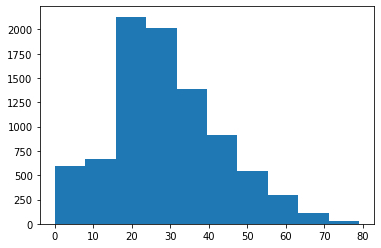

In [26]:
# Plot a histogram on Age
plt.hist(train['Age'])
None

Распределение по возрасту пассажиров.

In [27]:
# Минимальный, средний, наибольший возраста пассажиров.
train['Age'].min(), train['Age'].mean(), train['Age'].max()

(0.0, 28.847003336017487, 79.0)

В среднем пассажиры корабля имели 25-30 лет.

Распределение по возрасту пассажиров успешно добравшихся.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


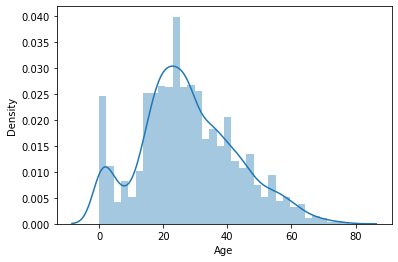

In [28]:
yes = train[train['Transported'] == True]
sns.distplot(yes['Age'])
None

In [26]:
yes['Age'].min(), yes['Age'].mean(), yes['Age'].max()

(0.0, 27.813841936957516, 78.0)

**Вывод:** Средний возраст "выживших" чуть меньше, чем средний возраст всех пассажиров.

In [29]:
people_count = train.pivot_table(index='HomePlanet',columns='Transported', aggfunc='count')['Destination']
people_count

Transported,False,True
HomePlanet,,
Earth,2704,1993
Europa,748,1436
Mars,863,949


In [30]:
yes_home = yes['HomePlanet'].value_counts()
yes_home

Earth     1993
Europa    1436
Mars       949
Name: HomePlanet, dtype: int64

In [31]:
no_home = no['HomePlanet'].value_counts()
no_home

Earth     2704
Mars       863
Europa     748
Name: HomePlanet, dtype: int64

In [32]:
total_home = train['HomePlanet'].value_counts()
total_home

Earth     4697
Europa    2184
Mars      1812
Name: HomePlanet, dtype: int64

In [33]:
total_ppl = pd.DataFrame({
    'HomePlanet': total_home.index,
    'total Passenger': total_home.values,
    'Transported' : yes_home.values,
    'not_Transported' : no_home.values,
    '%_Transported' : yes_home.values / total_home.values
}, columns = ['HomePlanet', 'total Passenger', 'Transported', 'not_Transported', '%_Transported'])
total_ppl.set_index('HomePlanet', inplace=True)
total_ppl

,total Passenger,Transported,not_Transported,%_Transported
HomePlanet,,,,
Earth,4697,1993,2704,0.424313
Europa,2184,1436,863,0.657509
Mars,1812,949,748,0.523731


**Вывод:** Самое большое число пассажиров отправились с `Earth`. С самым большим процентом успешно перебравшихся оказались пассажиры, отправлявшиеся с `Europa`.

In [34]:
# Find transported and not_transported homeplanet wise
def transpeople(start,end):
    # set width of bar
    barWidth = 0.20
    
    #set height of bar
    bars1 = total_ppl['total Passenger'][start:end]
    bars2 = total_ppl['Transported'][start:end]
    bars3 = total_ppl['not_Transported'][start:end]
    
    
    # set position of bar on X axis
    r1 = np.arange(bars1.size)
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    
     # Make the plot
    plt.bar(r1, bars1, color='#36688D', width=barWidth, edgecolor='white', label='Total Passenger')
    plt.bar(r2, bars2, color='#F3CD05', width=barWidth, edgecolor='white', label='Transported')
    plt.bar(r3, bars3, color='#F49F05', width=barWidth, edgecolor='white', label='not_Transported')
    
    # Add xticks on the middle of the group bars
    plt.xticks([r + barWidth for r in range(len(bars1))], total_ppl.index[start:end])

    # Create legend & Show graphic
    plt.legend()

Исчерпывающая диаграммма, в которой показано сколько пассажиров из каждой платены и их успех по целевой переменной.

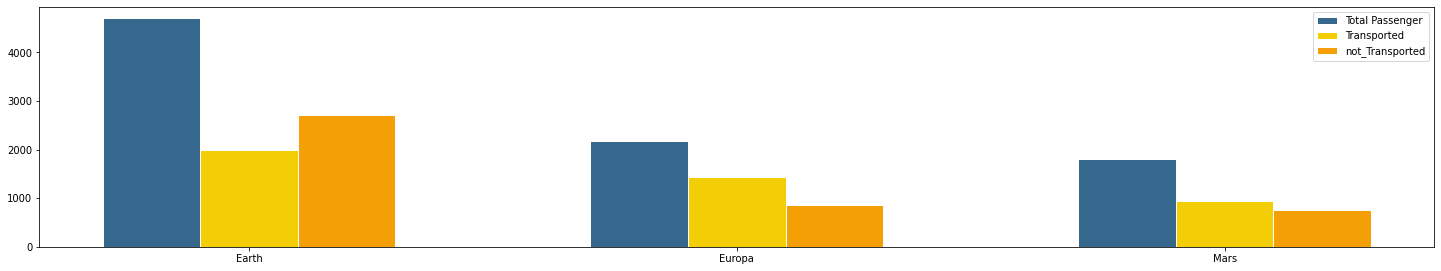

In [35]:
fig = plt.figure(figsize=(25,15))

plt.subplot(311)
transpeople(0,3)

Теперь посмотрим на конечные пункты назанчения.

In [36]:
train['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

Destination - планета, на которую будет высаживаться пассажир.

In [37]:
des = train['Destination'].value_counts()
des

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     978
Name: Destination, dtype: int64

In [38]:
des_pass = pd.DataFrame({
    'Destination' : des.index,
    'Total_Passenger' : des.values
},columns = ['Destination', 'Total_Passenger'])
des_pass

,Destination,Total_Passenger
0,TRAPPIST-1e,5915
1,55 Cancri e,1800
2,PSO J318.5-22,978


In [39]:
des_pass.set_index('Destination', inplace=True)

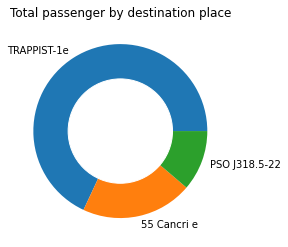

In [40]:
circle=plt.Circle((0,0), 0.6, color='white')

plt.pie(des_pass['Total_Passenger'], labels= des_pass.index)
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Total passenger by destination place')
None

Больше всего пассажиров добираются в TRAPPIST-1e.

In [41]:
total_des = train['Destination'].value_counts()
total_des

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     978
Name: Destination, dtype: int64

In [42]:
yes_des = yes['Destination'].value_counts()
yes_des

TRAPPIST-1e      2787
55 Cancri e      1098
PSO J318.5-22     493
Name: Destination, dtype: int64

In [43]:
no_des = no['Destination'].value_counts()
no_des

TRAPPIST-1e      3128
55 Cancri e       702
PSO J318.5-22     485
Name: Destination, dtype: int64

In [44]:
total_ppl = pd.DataFrame({
    'Destination': des.index,
    'total Passenger': total_des.values,
    'Transported' : yes_des.values,
    'not_Transported' : no_des.values,
    '%_Transported' : yes_des.values / total_des.values
}, columns = ['Destination', 'total Passenger', 'Transported', 'not_Transported', '%_Transported'])
total_ppl.set_index('Destination', inplace=True)
total_ppl

,total Passenger,Transported,not_Transported,%_Transported
Destination,,,,
TRAPPIST-1e,5915,2787,3128,0.471175
55 Cancri e,1800,1098,702,0.610000
PSO J318.5-22,978,493,485,0.504090


**Вывод:** Самое большое число пассажиров добирались до 	`TRAPPIST-1e`. С самым большим процентом успешно перебравшихся оказались пассажиры, добиравшиеся до `55 Cancri e`.

In [45]:
train['CryoSleep'].unique()

array([False, True, 'False'], dtype=object)

In [46]:
def encode_bool_train(x):
    if x == True:
        return 1
    else:
        return 0

train['CryoSleep'] = train['CryoSleep'].apply(encode_bool_train)

In [47]:
train['CryoSleep'].unique()

array([0, 1])

In [48]:
sleepping = train[train['Transported'] == True]
sleepping = sleepping['CryoSleep']
not_sleepping = train[train['Transported'] == False]
not_sleepping = not_sleepping['CryoSleep']

In [49]:
total_sleep = train['CryoSleep'].value_counts()
total_sleep

0    5656
1    3037
Name: CryoSleep, dtype: int64

In [50]:
yes_sleep = sleepping.value_counts()
yes_sleep

1    2483
0    1895
Name: CryoSleep, dtype: int64

In [51]:
no_sleep = not_sleepping.value_counts()
no_sleep

0    3761
1     554
Name: CryoSleep, dtype: int64

In [52]:
total_ppl = pd.DataFrame({
    'CryoSleep': ['True', 'False'],
    'total Passenger': total_sleep.values,
    'Transported' : yes_sleep.values,
    'not_Transported' : no_sleep.values,
    '%_Transported' : yes_sleep.values / total_sleep.values
}, columns = ['CryoSleep', 'total Passenger', 'Transported', 'not_Transported', '%_Transported'])
total_ppl.set_index('CryoSleep', inplace=True)
total_ppl

,total Passenger,Transported,not_Transported,%_Transported
CryoSleep,,,,
True,5656,2483,3761,0.439003
False,3037,1895,554,0.623971


**Вывод:** У пасажиров находящихся в криосонном состоянии было меньше шансов на успех, чем у бодрствующих.

Выкинем бесполезные данные.

In [53]:
#  Drop unnecessary columns
train.drop('PassengerId', axis=1, inplace=True)
train.drop('Name', axis=1, inplace=True)
# train.drop('Cabin', axis=1, inplace=True)

test.drop('PassengerId', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)
# test.drop('Cabin', axis=1, inplace=True)

In [54]:
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,1,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,0,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,0,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


Разделим составляющик номера каюты, чтобы лучше извлечь информацию.

In [55]:
train[['cabinn', 'a', 'b']] = train['Cabin'].str.split('/', expand=True)
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabinn,a,b
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [56]:
test[['cabinn', 'a', 'b']] = train['Cabin'].str.split('/', expand=True)

test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cabinn,a,b
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,B,0,P
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,0,S
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,A,0,S
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,A,0,S
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,1,S


Закодируем некоторые категориальные признаки.

In [57]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
train['encoded_HomePlanet'] = label_encoder.fit_transform(train['HomePlanet'])
train['encoded_Cabinn'] = label_encoder.fit_transform(train['cabinn'])
train['encoded_Destination'] = label_encoder.fit_transform(train['Destination'])
train['encoded_Transported'] = label_encoder.fit_transform(train['Transported'])

train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabinn,a,b,encoded_HomePlanet,encoded_Cabinn,encoded_Destination,encoded_Transported
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,1,1,2,0
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,0,5,2,1
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,1,0,2,0
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,1,0,2,0
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,0,5,2,1


In [58]:
def encode_bool_train(x):
    if x == True:
        return 1
    else:
        return 0
train['VIP'] = train['VIP'].apply(encode_bool_train)

In [59]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabinn,a,b,encoded_HomePlanet,encoded_Cabinn,encoded_Destination,encoded_Transported
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,B,0,P,1,1,2,0
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,F,0,S,0,5,2,1
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,1,0,2,0
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,1,0,2,0
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,F,1,S,0,5,2,1


In [60]:
label_encoder = preprocessing.LabelEncoder()
test['encoded_HomePlanet'] = label_encoder.fit_transform(test['HomePlanet'])
test['encoded_Cabinn'] = label_encoder.fit_transform(test['cabinn'])
test['encoded_Destination'] = label_encoder.fit_transform(test['Destination'])

test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cabinn,a,b,encoded_HomePlanet,encoded_Cabinn,encoded_Destination
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,B,0,P,0,1,2
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,0,S,0,5,2
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,A,0,S,1,0,0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,A,0,S,1,0,2
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,1,S,0,5,2


In [61]:
def encode_bool_test(x):
    if x == True:
        return 1
    else:
        return 0

test['CryoSleep'] = test['CryoSleep'].apply(encode_bool_test)
test['VIP'] = test['VIP'].apply(encode_bool_test)

In [62]:
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cabinn,a,b,encoded_HomePlanet,encoded_Cabinn,encoded_Destination
0,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,B,0,P,0,1,2
1,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,F,0,S,0,5,2
2,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,A,0,S,1,0,0
3,Europa,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,A,0,S,1,0,2
4,Earth,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,F,1,S,0,5,2


Выкинем категориальные колонки после преобразования из в числовые.

In [63]:
# Drop unnecessary column

train.drop('HomePlanet', axis=1, inplace=True)
train.drop('Cabin', axis=1, inplace=True)
train.drop('cabinn', axis=1, inplace=True)
train.drop('Destination', axis=1, inplace=True)
train.drop('Transported', axis=1, inplace=True)
train.drop('a', axis=1, inplace=True)
train.drop('b', axis=1, inplace=True)
# train.drop('CryoSleep', axis=1, inplace=True)
# train.drop('VIP', axis=1, inplace=True)

test.drop('HomePlanet', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)
test.drop('cabinn', axis=1, inplace=True)
test.drop('Destination', axis=1, inplace=True)
test.drop('a', axis=1, inplace=True)
test.drop('b', axis=1, inplace=True)
# test.drop('CryoSleep', axis=1, inplace=True)
# test.drop('VIP', axis=1, inplace=True)

In [65]:
train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,encoded_HomePlanet,encoded_Cabinn,encoded_Destination,encoded_Transported
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,1,1,2,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,0,5,2,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,1,0,2,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,1,0,2,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,0,5,2,1


In [66]:
test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,encoded_HomePlanet,encoded_Cabinn,encoded_Destination
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,0,1,2
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,0,5,2
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,0,2
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,0,5,2


Переведём в [0-100] числовые признаки.

In [67]:
cols_to_norm = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
train[cols_to_norm] = train[cols_to_norm].apply(lambda x: ((x - x.min()) / (x.max() - x.min())*100 ))
test[cols_to_norm] = test[cols_to_norm].apply(lambda x: ((x - x.min()) / (x.max() - x.min())*100 ))

In [68]:
train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,encoded_HomePlanet,encoded_Cabinn,encoded_Destination,encoded_Transported
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,2,0
1,0,24.0,0,0.760801,0.030188,0.106419,2.450018,0.182323,0,5,2,1
2,0,58.0,1,0.300133,11.994767,0.000000,29.966976,0.203041,1,0,2,0
3,0,33.0,0,0.000000,4.303492,1.579261,14.856301,0.799735,1,0,2,0
4,0,16.0,0,2.114888,0.234797,0.642772,2.521421,0.008287,0,5,2,1


In [69]:
test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,encoded_HomePlanet,encoded_Cabinn,encoded_Destination
0,1,27.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,2
1,0,19.0,0,0.000000,0.035611,0.000000,14.225963,0.000000,0,5,2
2,1,31.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0
3,0,38.0,0,0.000000,26.320579,0.000000,0.912114,2.626616,1,0,2
4,0,20.0,0,0.086453,0.000000,7.657984,0.000000,0.000000,0,5,2


Feature Selection (correlation)

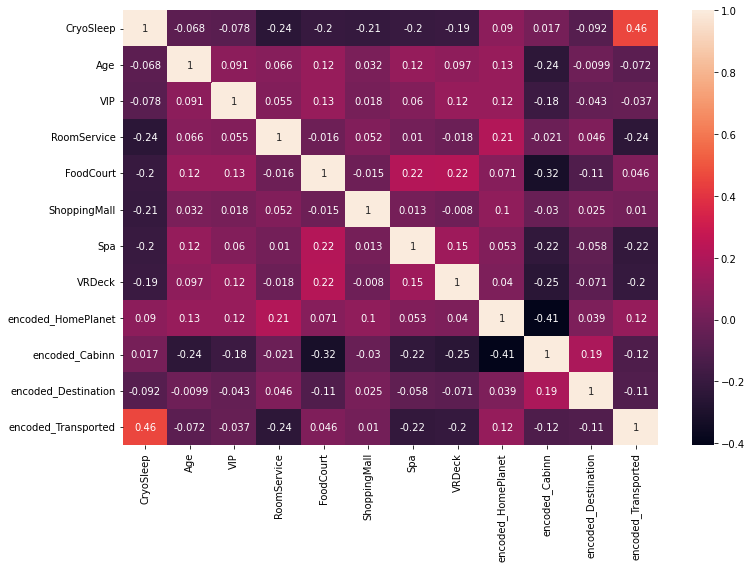

In [70]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(train.corr(), annot=True)
plt.show()

In [71]:
x = train.drop('encoded_Transported', axis=1)
y = train['encoded_Transported']

In [72]:
train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,encoded_HomePlanet,encoded_Cabinn,encoded_Destination,encoded_Transported
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,2,0
1,0,24.0,0,0.760801,0.030188,0.106419,2.450018,0.182323,0,5,2,1
2,0,58.0,1,0.300133,11.994767,0.000000,29.966976,0.203041,1,0,2,0
3,0,33.0,0,0.000000,4.303492,1.579261,14.856301,0.799735,1,0,2,0
4,0,16.0,0,2.114888,0.234797,0.642772,2.521421,0.008287,0,5,2,1


In [73]:
test['encoded_Cabinn'].unique()

array([1, 5, 0, 6, 4, 3, 2, 7])

In [74]:
x.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,encoded_HomePlanet,encoded_Cabinn,encoded_Destination
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,2
1,0,24.0,0,0.760801,0.030188,0.106419,2.450018,0.182323,0,5,2
2,0,58.0,1,0.300133,11.994767,0.000000,29.966976,0.203041,1,0,2
3,0,33.0,0,0.000000,4.303492,1.579261,14.856301,0.799735,1,0,2
4,0,16.0,0,2.114888,0.234797,0.642772,2.521421,0.008287,0,5,2


Отрисуем матрицу корреляции без целевой переменной.

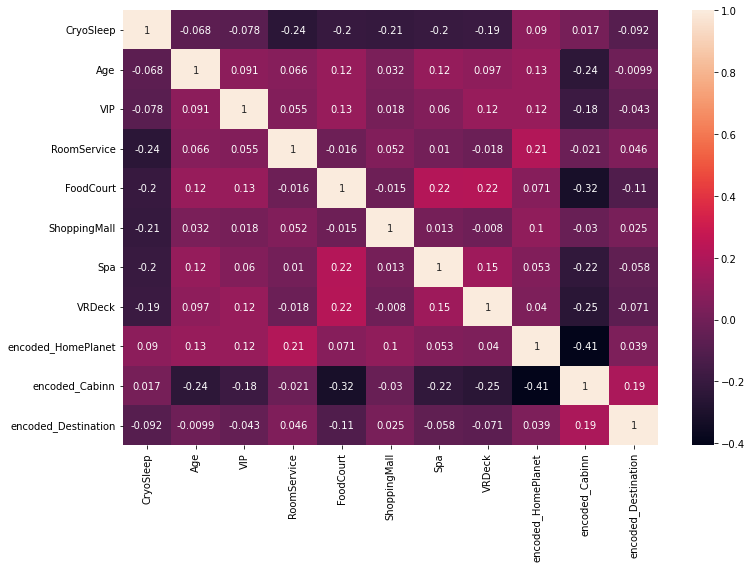

In [75]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(x.corr(), annot=True)
plt.show()

In [76]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [77]:
corr_features = correlation(x, 0.3)
len(set(corr_features))

1

In [78]:
corr_features

{'encoded_Cabinn'}

In [79]:
X_corr = x.drop(corr_features,axis=1)
X_corr

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,encoded_HomePlanet,encoded_Destination
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,2
1,0,24.0,0,0.760801,0.030188,0.106419,2.450018,0.182323,0,2
2,0,58.0,1,0.300133,11.994767,0.000000,29.966976,0.203041,1,2
3,0,33.0,0,0.000000,4.303492,1.579261,14.856301,0.799735,1,2
4,0,16.0,0,2.114888,0.234797,0.642772,2.521421,0.008287,0,2
...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.000000,22.872572,0.000000,7.332203,0.306634,1,0
8689,1,18.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1
8690,0,26.0,0,0.000000,0.000000,7.968670,0.004463,0.000000,0,2
8691,0,32.0,0,0.000000,3.518599,0.000000,1.575330,13.404881,1,0


In [80]:
test_data = test.drop(corr_features, axis=1)
test_data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,encoded_HomePlanet,encoded_Destination
0,1,27.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,2
1,0,19.0,0,0.000000,0.035611,0.000000,14.225963,0.000000,0,2
2,1,31.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0
3,0,38.0,0,0.000000,26.320579,0.000000,0.912114,2.626616,1,2
4,0,20.0,0,0.086453,0.000000,7.657984,0.000000,0.000000,0,2
...,...,...,...,...,...,...,...,...,...,...
4272,1,34.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,2
4273,0,42.0,0,0.000000,3.351403,0.205017,0.050393,0.646552,0,2
4274,1,43.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2,0
4275,0,43.0,0,0.000000,10.604202,0.000000,0.000000,2.348240,1,1


**Вывод:** В итоге мы получили числовую, нормированную матрицу. Посморели зависимсть признаков от целевой переменной и зависимость признаков между собой. Мы удалили один из признаков, так как он достаточно сильно зависил от другого. А также убедились в том, что наши признаки зависят от целевой переменной - это повышает шансы получить хорошую классификационную модель.  